In [1]:
from IPython.display import clear_output
clear_output()

In [2]:
from IPython.display import display, HTML

In [3]:
import numpy as np 

In [4]:
from tqdm import tqdm

In [5]:
import cv2

In [6]:
import os

In [7]:
import shutil

In [8]:
import itertools

In [9]:
import imutils

In [10]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.preprocessing import LabelBinarizer

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
import plotly.graph_objs as go

In [15]:
from plotly.offline import init_notebook_mode, iplot

In [16]:
from plotly import tools

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [20]:
from tensorflow.keras import layers

In [21]:
from tensorflow.keras.models import Model, Sequential

In [22]:
from tensorflow.keras.optimizers import Adam, RMSprop

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
from sklearn.utils import Bunch

In [25]:
from sklearn import svm, metrics, datasets

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [27]:
from skimage.io import imread

In [28]:
from skimage.transform import resize

In [29]:
from pathlib import Path

In [30]:
from sklearn import tree

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
import pandas as pd

In [33]:
from math import *

In [34]:
init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [35]:
IMG_PATH = 'Dataset/'

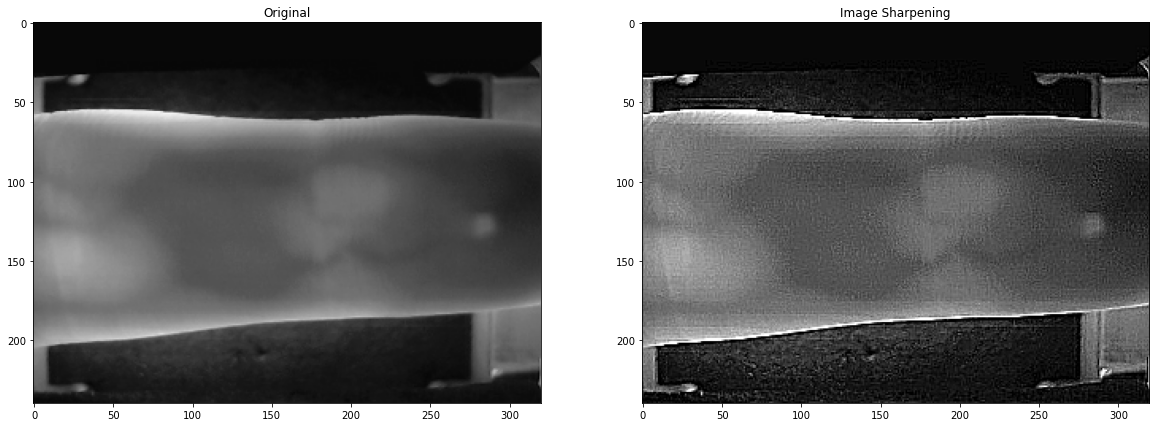

In [36]:
image = cv2.imread('Dataset/001/index_1.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)


kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)


plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)

plt.show()

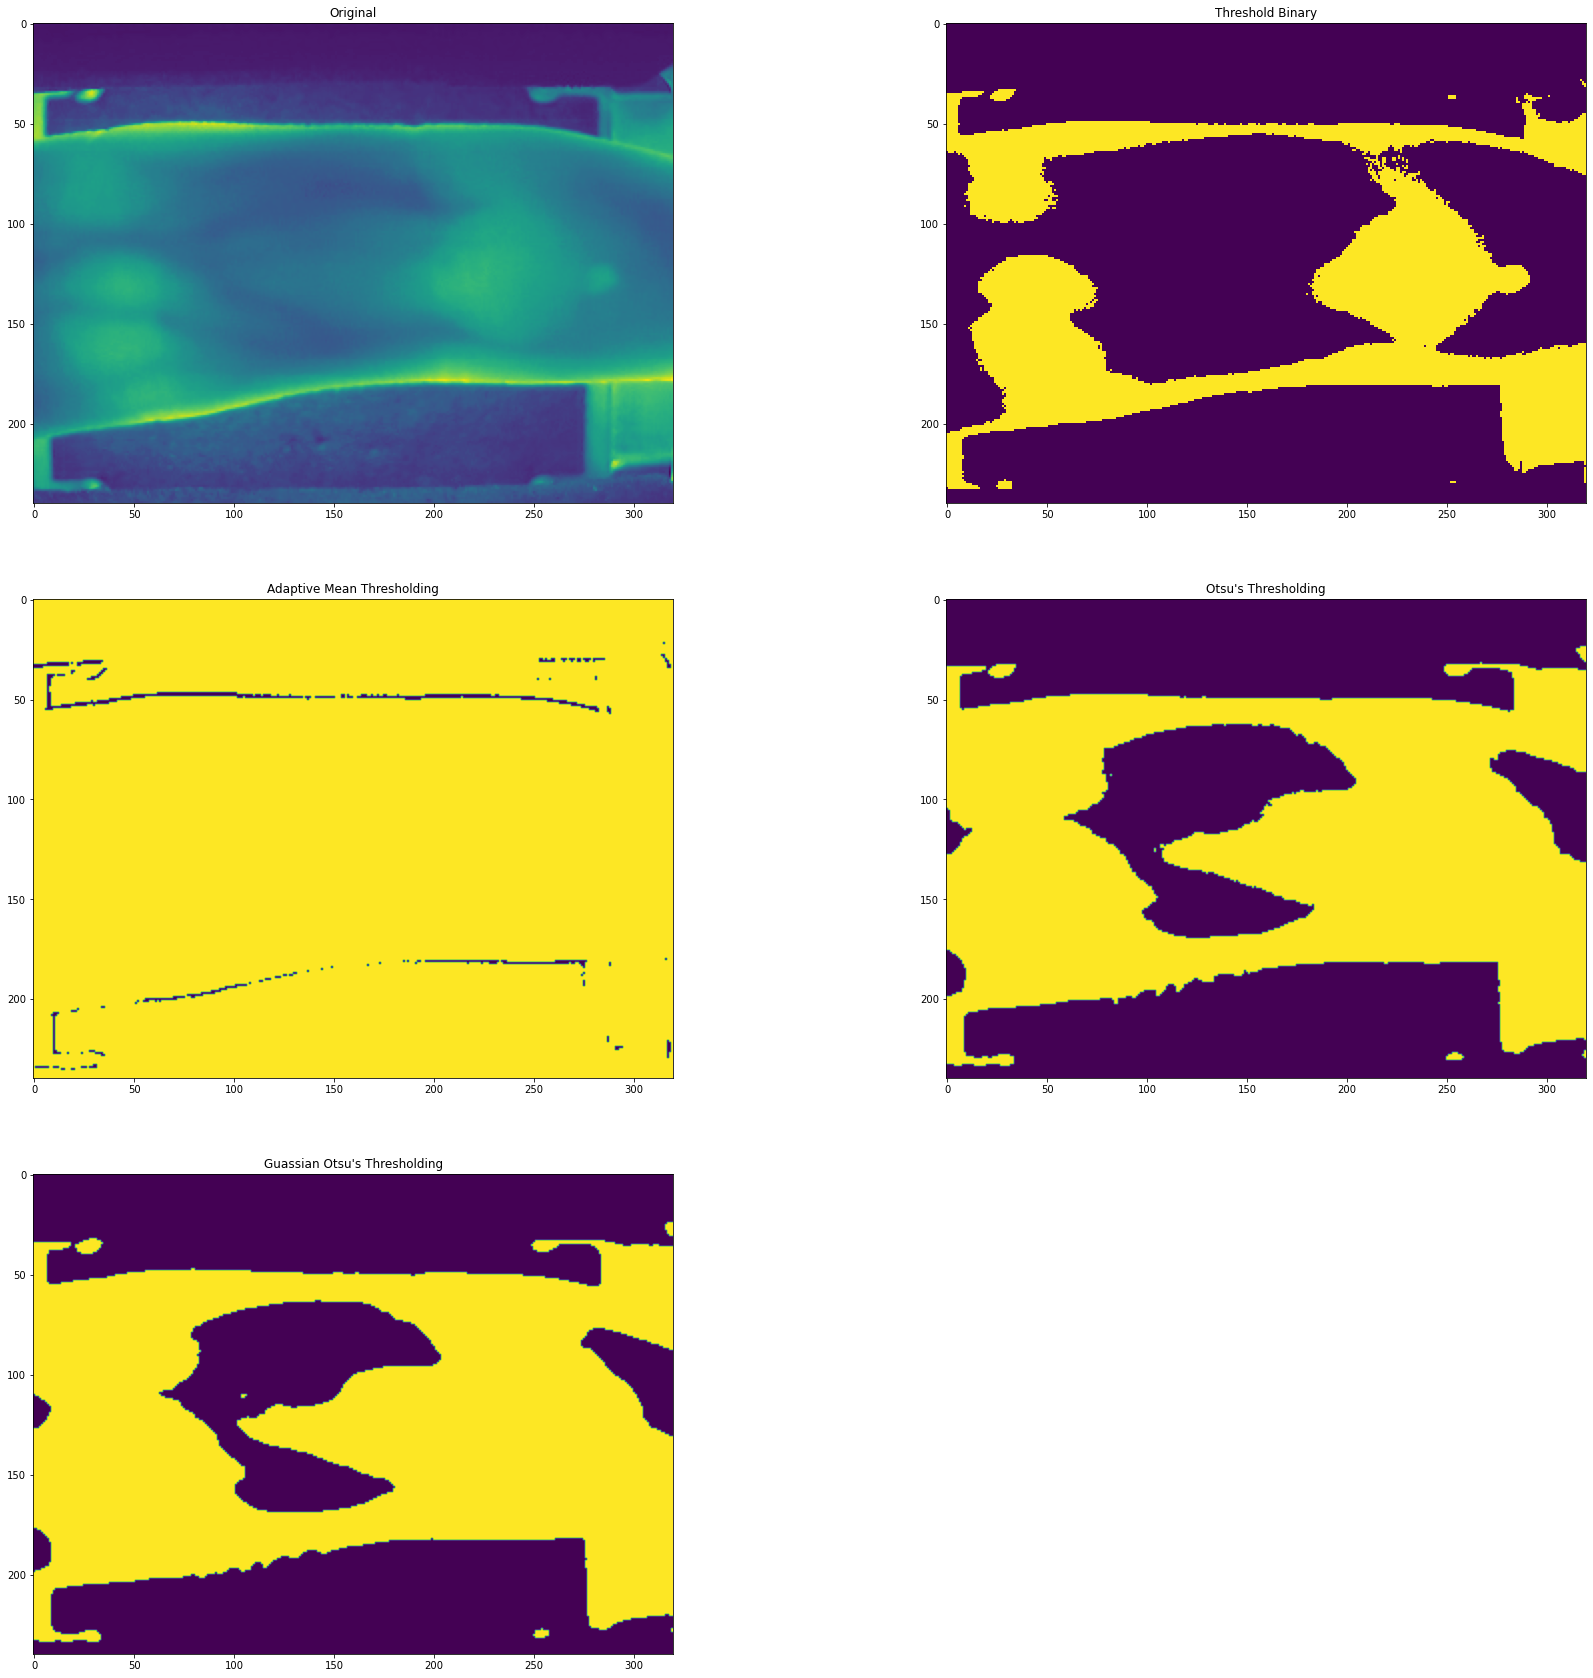

In [37]:
image = cv2.imread('Dataset/002/index_2.bmp', 0)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)


image = cv2.GaussianBlur(image, (3, 3), 0)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 

plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)


_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2)


plt.subplot(3, 2, 5)
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()


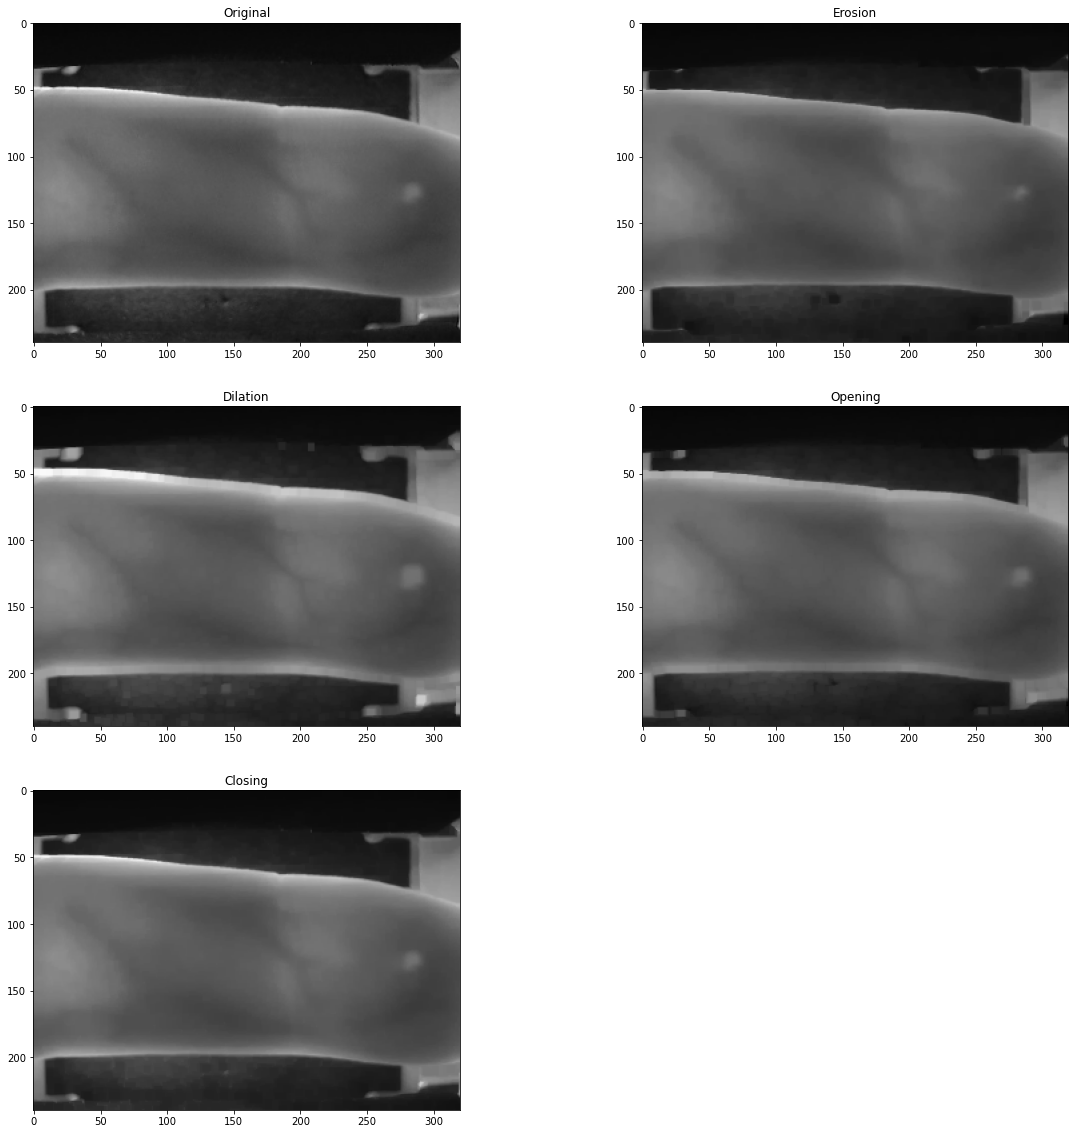

In [38]:
image = cv2.imread('Dataset/003/index_3.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)


kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)

# 
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)


opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)


closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


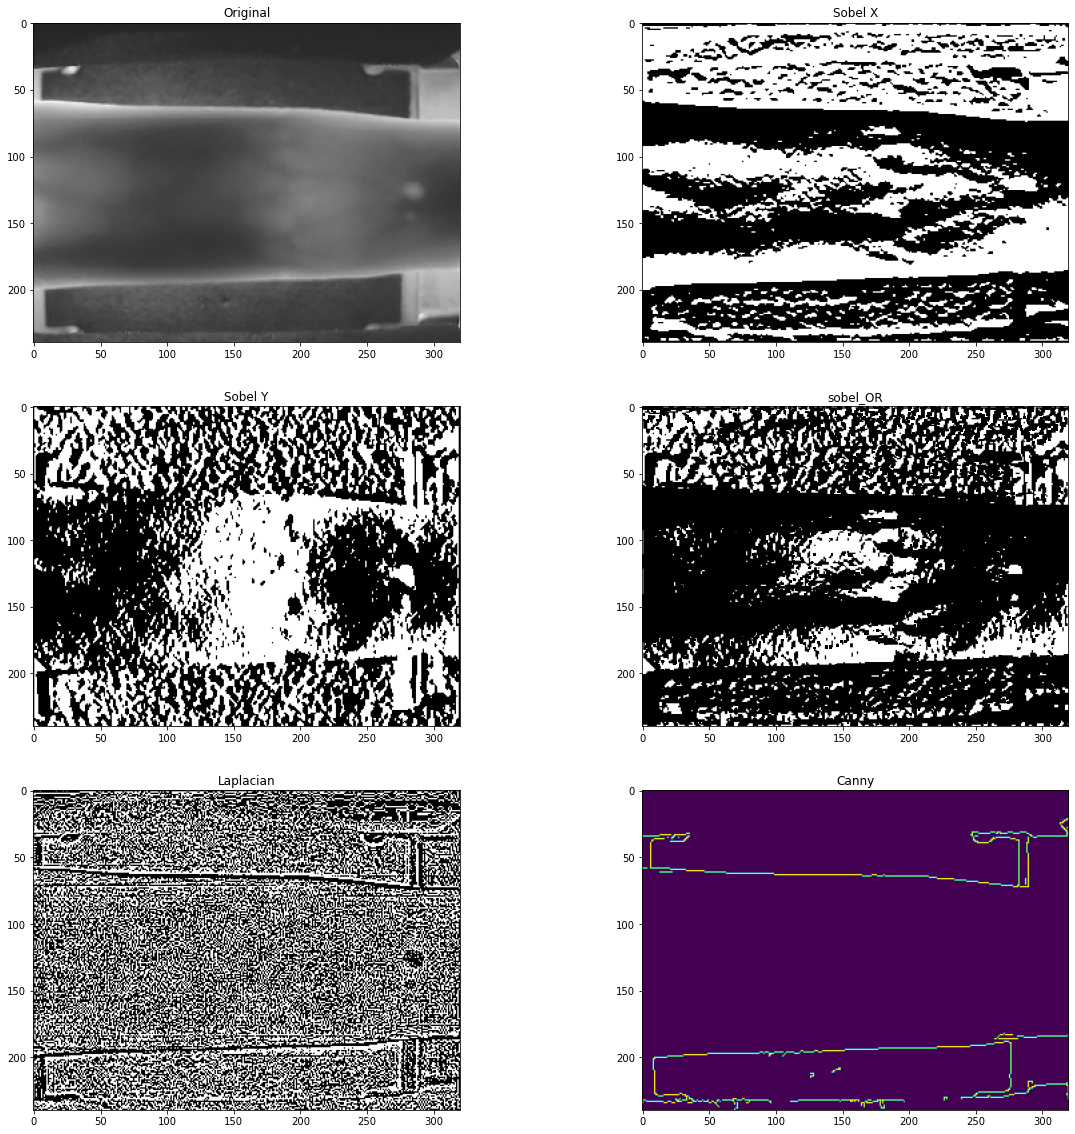

In [39]:
image = cv2.imread('Dataset/004/middle_1.bmp', 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = image.shape

sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

canny = cv2.Canny(image, 50, 120)

plt.subplot(3, 2, 6)
plt.title("Canny")
plt.imshow(canny)

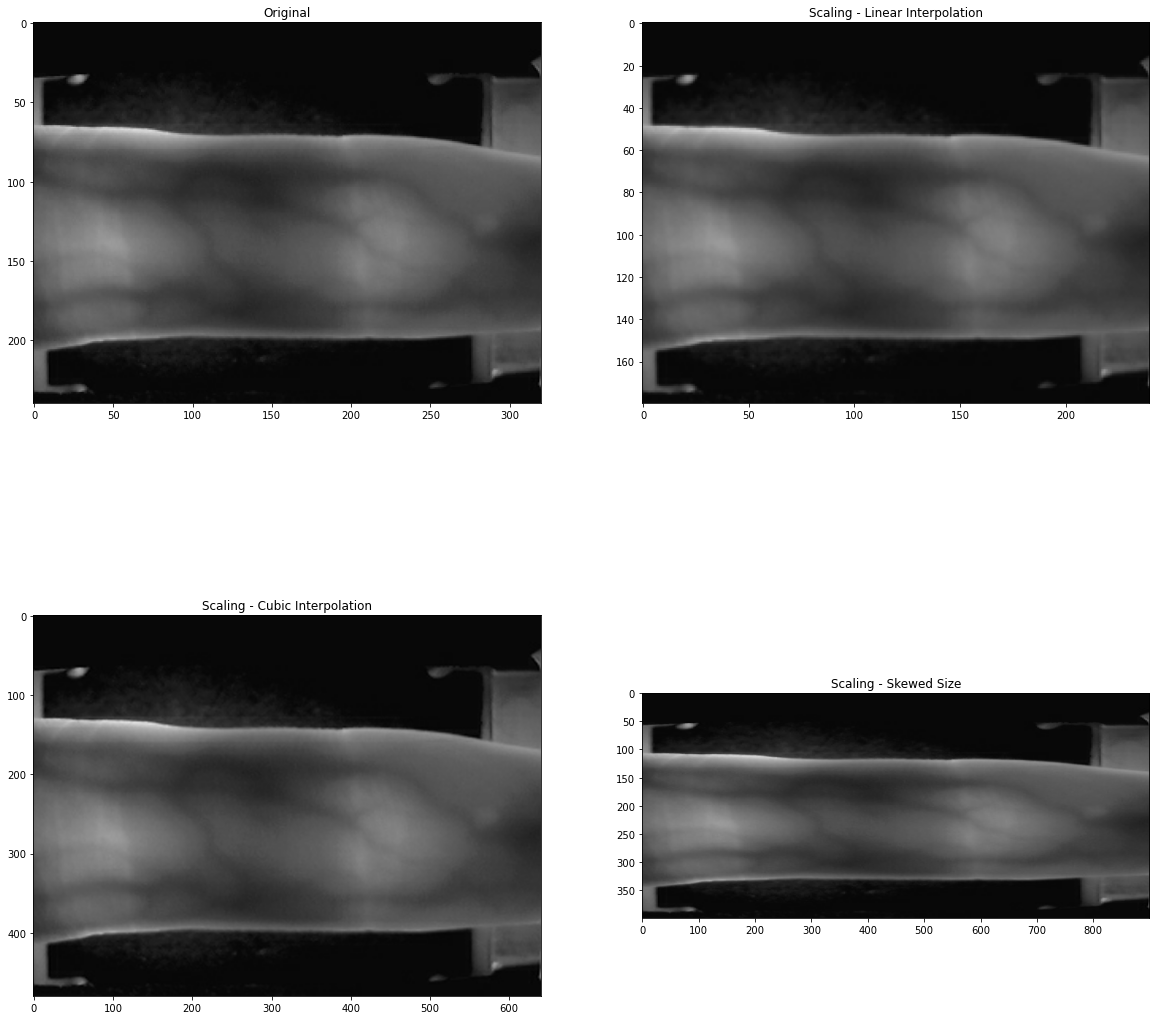

In [40]:
image = cv2.imread('Dataset/005/index_6.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)

plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)

img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)

img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)

plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

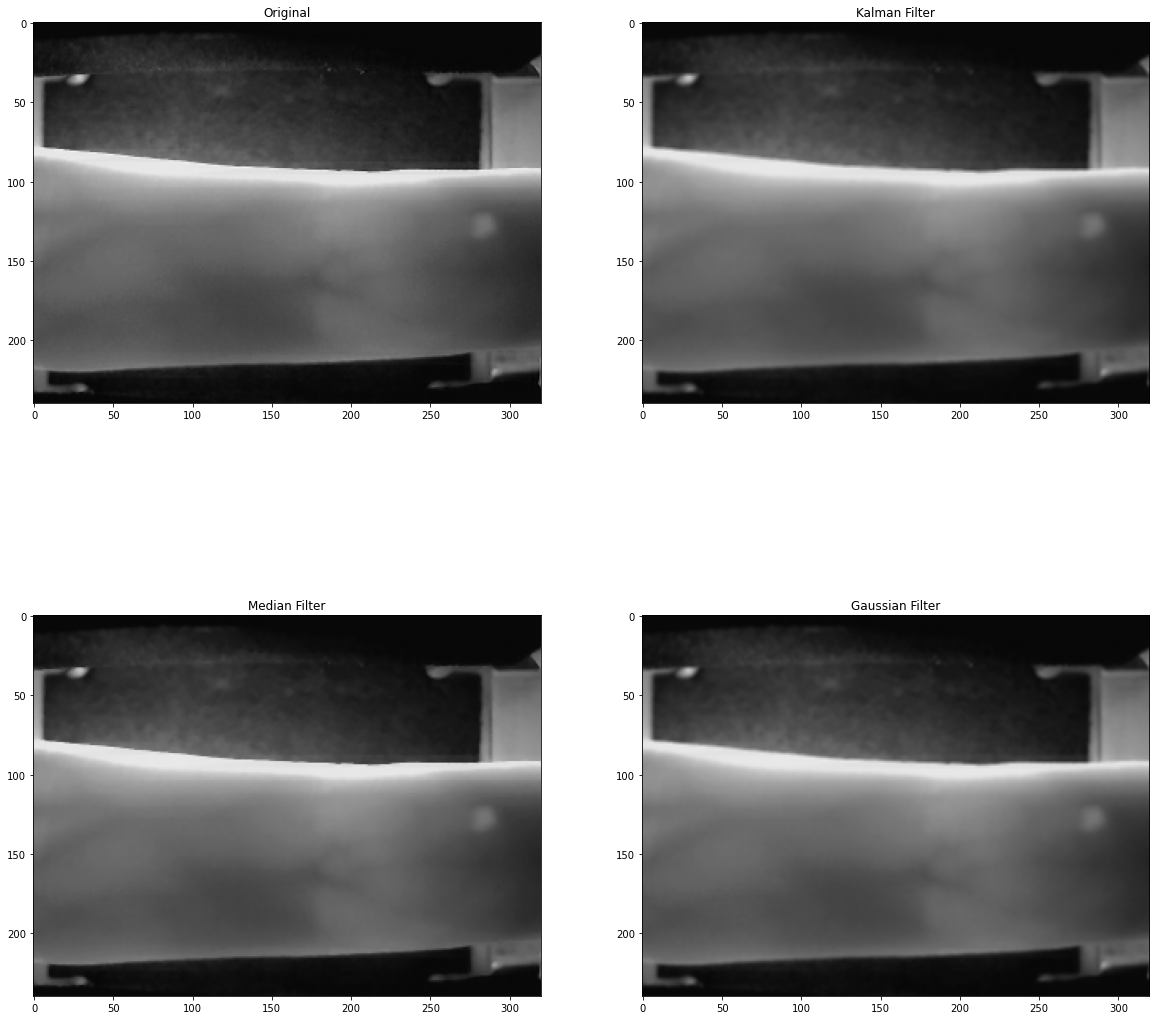

In [41]:
image = cv2.imread('Dataset/001/ring_6.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

kalman_3x3 = np.ones((3, 3), np.float32) / 9

blurred = cv2.filter2D(image, -1, kalman_3x3)

plt.subplot(2, 2, 2)
plt.title("Kalman Filter")
plt.imshow(blurred)

kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.medianBlur(image, 3)

plt.subplot(2, 2, 3)
plt.title("Median Filter")
plt.imshow(blurred2)

blurred3 = cv2.GaussianBlur(image, (3,3),1)

plt.subplot(2, 2, 4)
plt.title("Gaussian Filter")
plt.imshow(blurred3)

Number of Contours found = 5


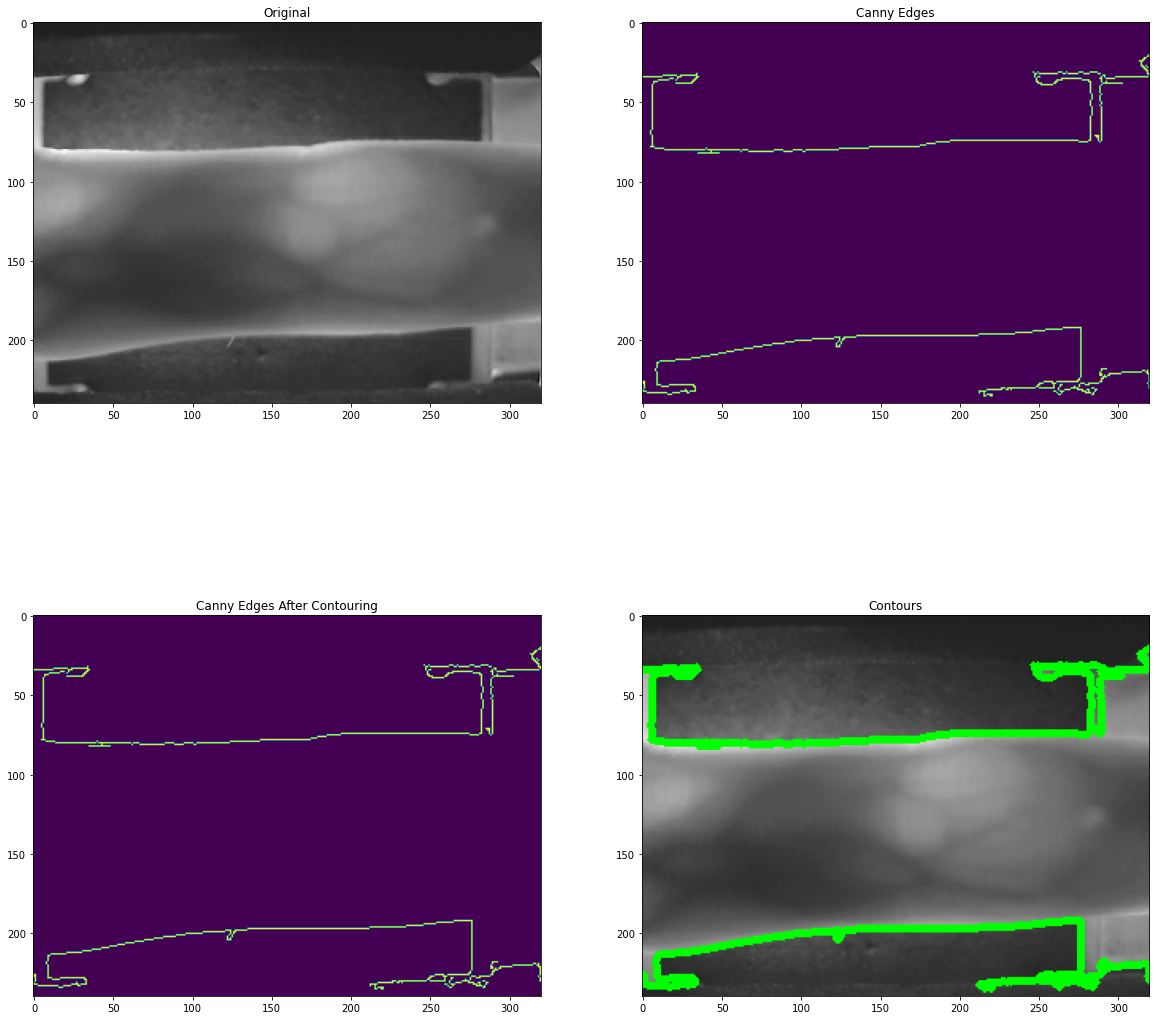

In [42]:
image = cv2.imread('Dataset/002/ring_4.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)



gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)



contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))


cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

<ipython-input-43-b1b31c3ae319>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<ipython-input-43-b1b31c3ae319>:36: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



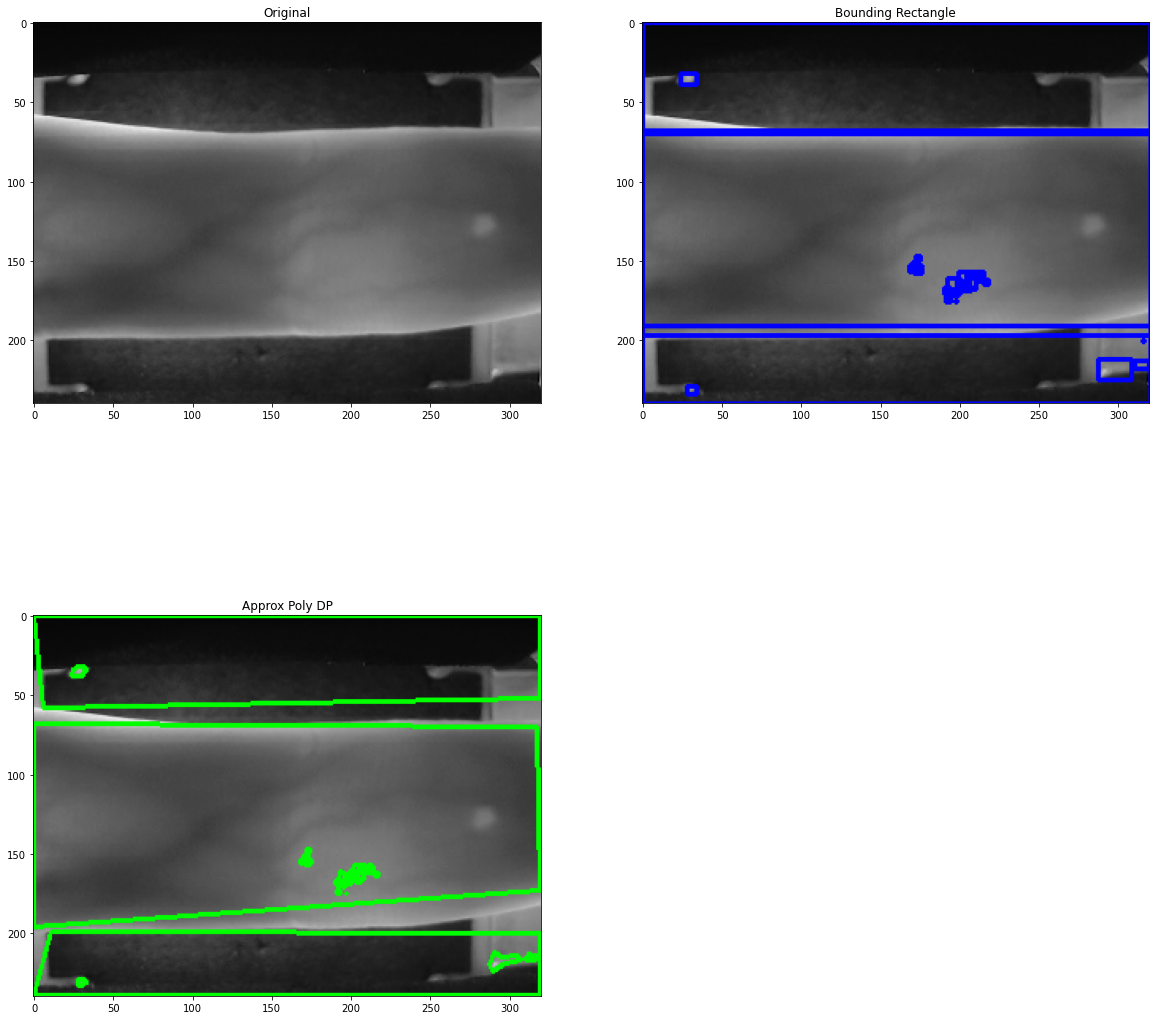

In [43]:
image = cv2.imread('Dataset/003/ring_4.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

orig_image = image.copy()



gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)


contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    plt.subplot(2, 2, 2)
    plt.title("Bounding Rectangle")
    plt.imshow(orig_image)

    

for c in contours:
    
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    
    plt.subplot(2, 2, 3)
    plt.title("Approx Poly DP")
    plt.imshow(image)

plt.show()
    

In [44]:

for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 5:
                shutil.copy(img, 'Dataset1/Test/' + CLASS.upper() + '/' + FILE_NAME)
            elif n < 0.8*IMG_NUM:
                shutil.copy(img, 'Dataset1/Train/'+ CLASS.upper() + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'Dataset1/Val/'+ CLASS.upper() + '/' + FILE_NAME)

In [45]:
def load_data(dir_path, img_size=(100,100)):
    
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels





In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [47]:
TRAIN_DIR = 'Dataset1/TRAIN/'

In [48]:
TEST_DIR = 'Dataset1/TEST/'

In [49]:
VAL_DIR = 'Dataset1/VAL/'

In [50]:
IMG_SIZE = (320,240)

In [51]:
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.12it/s]

100 images loaded from Dataset1/TRAIN/ directory.


In [52]:
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.72it/s]

40 images loaded from Dataset1/TEST/ directory.


In [53]:
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 21.64it/s]

40 images loaded from Dataset1/VAL/ directory.


In [54]:
y = dict()

In [55]:
y[0] = []

In [56]:
y[1] = []

In [57]:
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

In [58]:
trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [59]:
def plot_samples(X, y, labels_dict, n=50):
    
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('FingerVein: {}'.format(labels_dict[index]))
        plt.show()

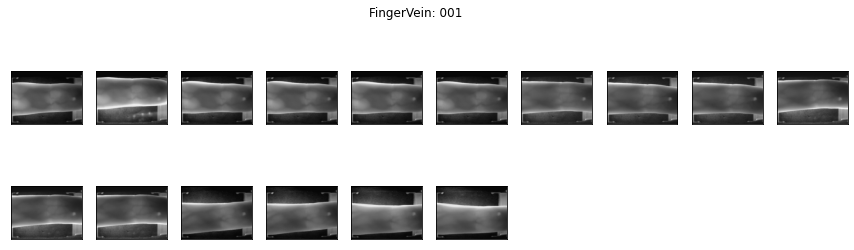

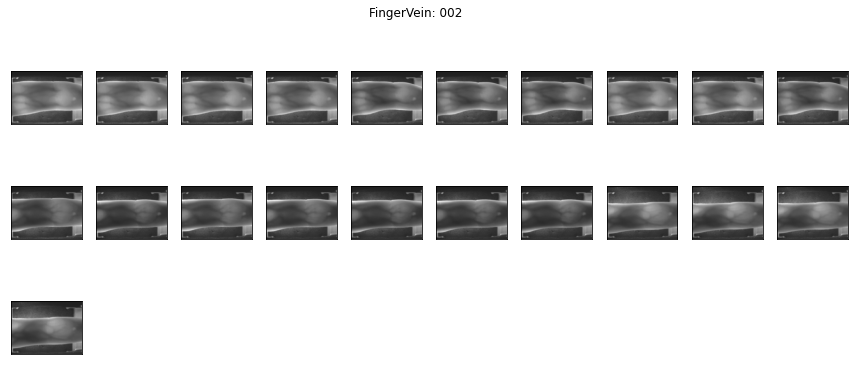

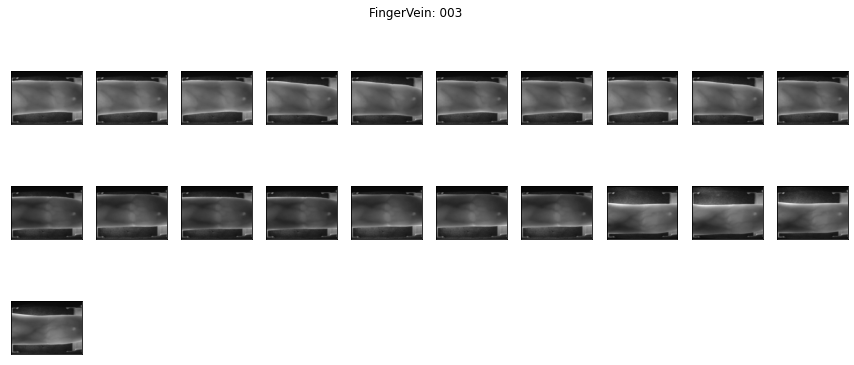

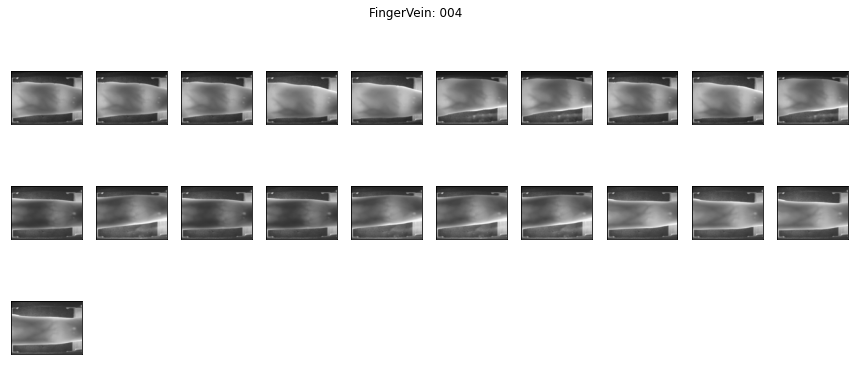

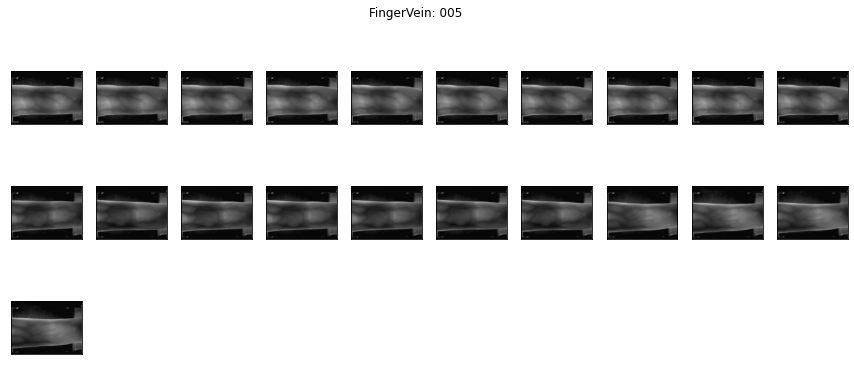

In [60]:
plot_samples(X_train, y_train, labels, 30)

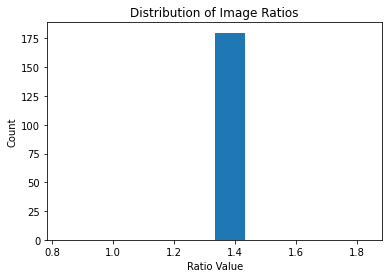

In [61]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [62]:
def crop_imgs(set_name, add_pixels_value=0):
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [63]:
img = cv2.imread('Dataset/001/index_3.bmp')

In [64]:
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )

In [65]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [66]:
gray = cv2.GaussianBlur(gray, (5, 5), 0)

In [67]:
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]

In [68]:
thresh = cv2.erode(thresh, None, iterations=2)

In [69]:
thresh = cv2.dilate(thresh, None, iterations=2)

In [70]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [71]:
cnts = imutils.grab_contours(cnts)

In [72]:
c = max(cnts, key=cv2.contourArea)

In [73]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])

In [74]:
extRight = tuple(c[c[:, :, 0].argmax()][0])

In [75]:
extTop = tuple(c[c[:, :, 1].argmin()][0])

In [76]:
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [77]:
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

In [78]:
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)

In [79]:
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)

In [80]:
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)

In [81]:
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

In [82]:
ADD_PIXELS = 0

In [83]:
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

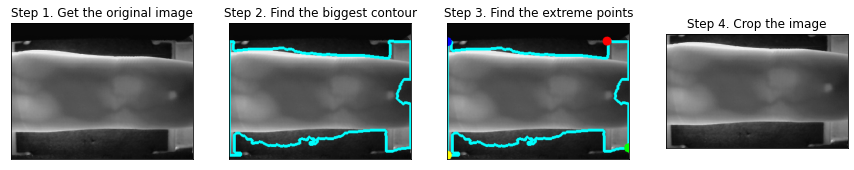

In [84]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('Dataset/001/index_3.bmp')
gray_img = rgb2gray(img)

In [87]:
pyr_img = multiPyrDown(gray_img, debug=True)

### Starting Multi-PyrDown ###
(240, 320)
(120, 160)
(60, 80)
(30, 40)
(15, 20)
(8, 10)
(4, 5)
(2, 3)
### Multi-PyrDown, Done with length: 9 ###


In [88]:
X_train_crop = crop_imgs(set_name=X_train)

<ipython-input-62-0070cb3d9a28>:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [89]:
X_val_crop = crop_imgs(set_name=X_val)

<ipython-input-62-0070cb3d9a28>:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [90]:
X_test_crop = crop_imgs(set_name=X_test)

<ipython-input-62-0070cb3d9a28>:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



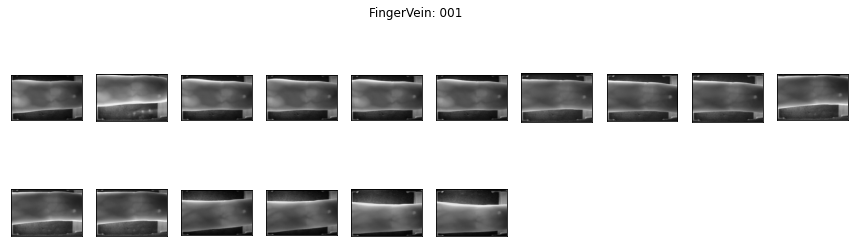

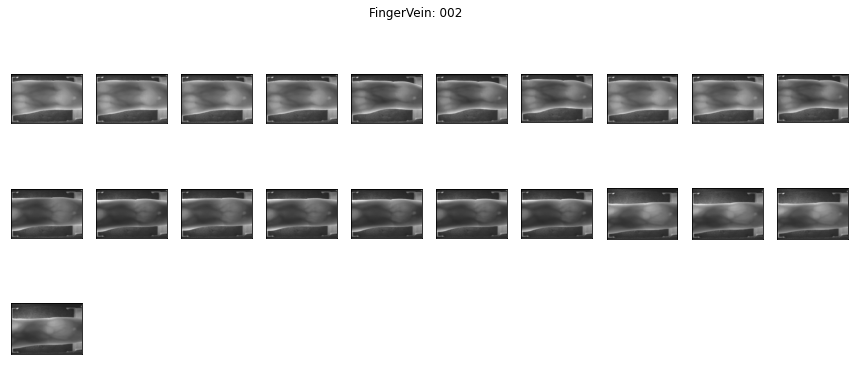

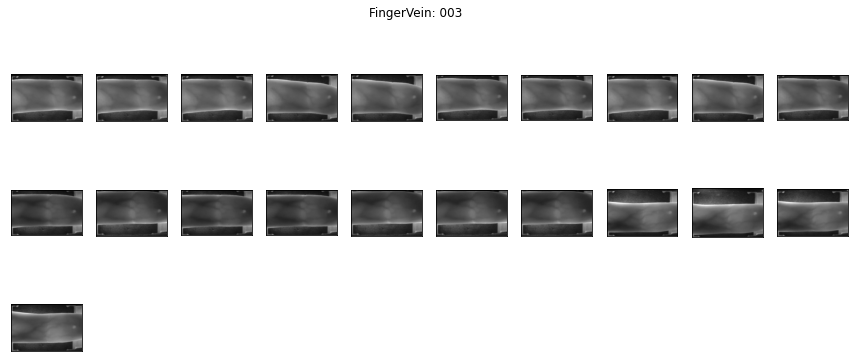

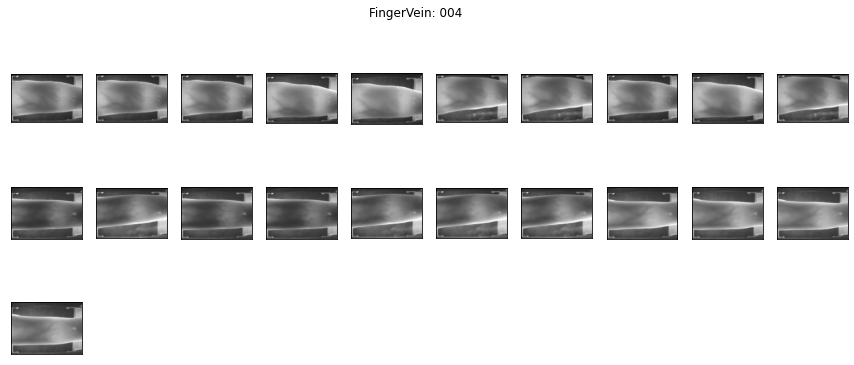

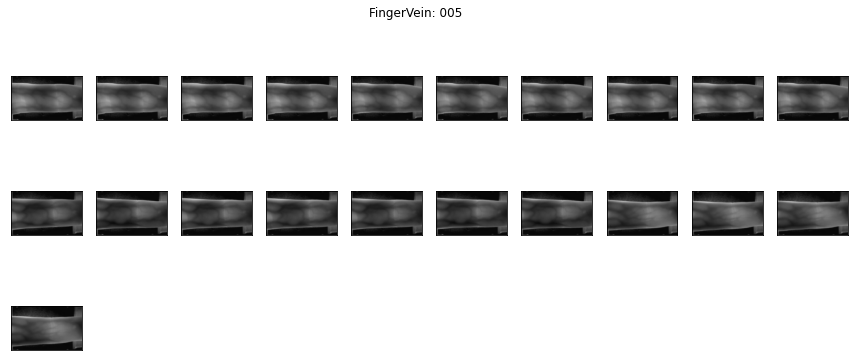

In [91]:
plot_samples(X_train_crop, y_train, labels, 30)

In [92]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [93]:

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

In [94]:
def preprocess_imgs(set_name, img_size):
    
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [95]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

In [96]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [97]:
#os.mkdir('preview')
x = X_train_crop[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

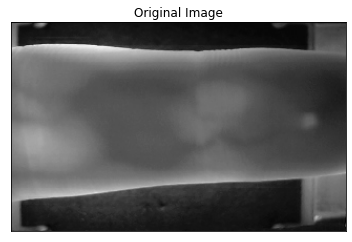

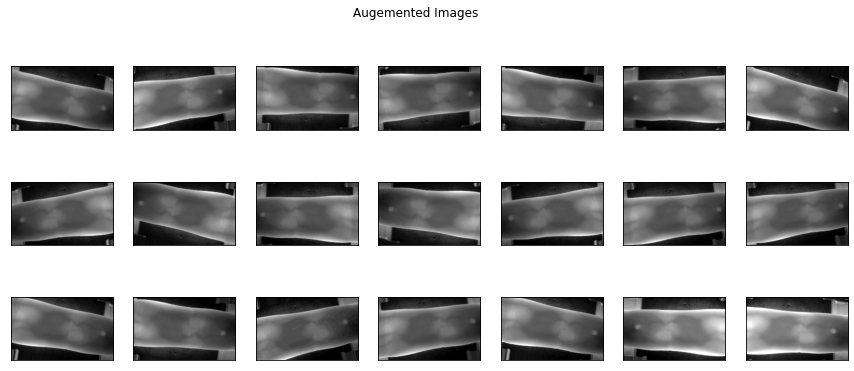

In [98]:
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [99]:
train_path = 'Dataset1/Train/'
val_path = 'Dataset1/Val/'
test_path = 'Dataset1/Test/'

In [100]:
IMAGE_SIZE = [320, 240]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 5 # We are aware of it.

In [101]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [102]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['001', '002', '003', '004', '005'] 
 and the length is : 5


In [103]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [104]:
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (320, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 100 images belonging to 5 classes.


In [105]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [106]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (320, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 40 images belonging to 5 classes.


In [107]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [108]:
val_set = val_datagen.flow_from_directory(
    directory = val_path,
    target_size = (320, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle=False
)

Found 40 images belonging to 6 classes.


In [109]:
val_set.reset()

In [110]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [111]:
for layer in vgg.layers:
    layer.trainable = False

In [112]:
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [113]:
model = Model(inputs=vgg.input, outputs=prediction)

In [114]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 320, 240, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 60, 128)       0     

In [115]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [119]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
4/4 [==============================] - 18s 5s/step - loss: 0.8695 - accuracy: 0.6400 - val_loss: 0.3570 - val_accuracy: 0.9750
Epoch 2/5
4/4 [==============================] - 26s 6s/step - loss: 0.8733 - accuracy: 0.7500 - val_loss: 0.7914 - val_accuracy: 0.8000
Epoch 3/5
4/4 [==============================] - 27s 7s/step - loss: 0.8166 - accuracy: 0.7900 - val_loss: 0.3343 - val_accuracy: 0.9000
Epoch 4/5
4/4 [==============================] - 27s 7s/step - loss: 0.5560 - accuracy: 0.7400 - val_loss: 0.3563 - val_accuracy: 0.9250
Epoch 5/5
4/4 [==============================] - 22s 5s/step - loss: 0.8970 - accuracy: 0.6700 - val_loss: 0.4196 - val_accuracy: 0.9000


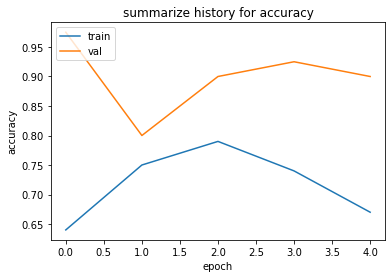

In [120]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 489ms/step
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 2 2 2 3 0 0 3 3 3 3 3 3 3 4 4 4 4 0 0 0 0 0
 1 0 0]
Predictions: 	 Filename:
001 		 001\index_4.bmp


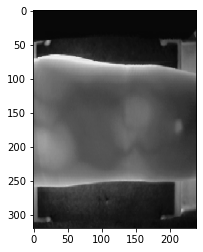

Predictions: 	 Filename:
001 		 001\index_5.bmp


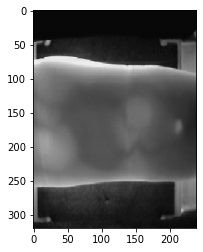

Predictions: 	 Filename:
001 		 001\middle_4.bmp


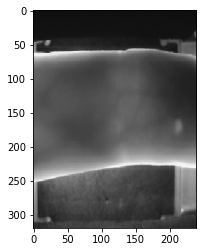

Predictions: 	 Filename:
001 		 001\middle_5.bmp


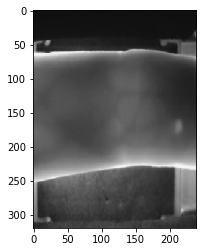

Predictions: 	 Filename:
001 		 001\ring_4.bmp


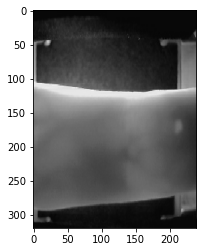

Predictions: 	 Filename:
001 		 001\ring_5.bmp


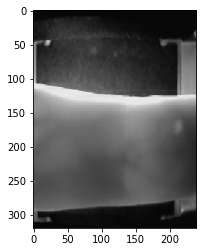

Predictions: 	 Filename:
001 		 001\ring_6.bmp


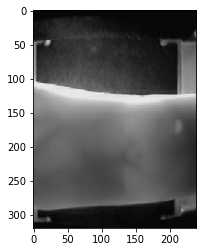

Predictions: 	 Filename:
002 		 002\index_4.bmp


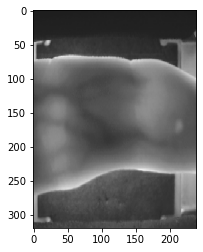

Predictions: 	 Filename:
002 		 002\index_5.bmp


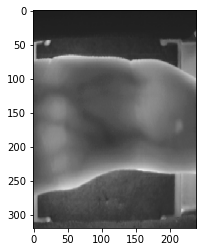

Predictions: 	 Filename:
002 		 002\middle_4.bmp


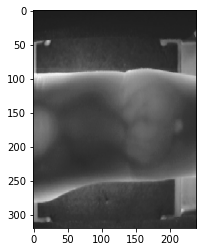

Predictions: 	 Filename:
002 		 002\middle_5.bmp


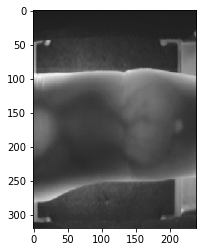

Predictions: 	 Filename:
002 		 002\ring_4.bmp


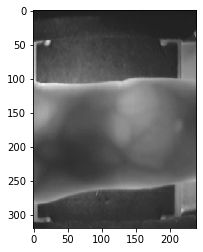

Predictions: 	 Filename:
002 		 002\ring_5.bmp


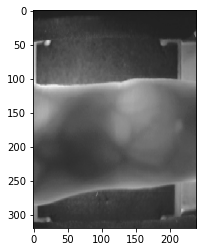

Predictions: 	 Filename:
002 		 002\ring_6.bmp


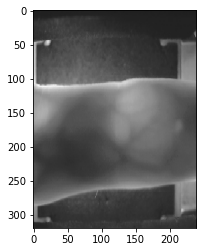

Predictions: 	 Filename:
001 		 003\index_4.bmp


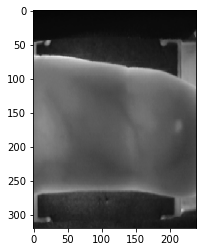

Predictions: 	 Filename:
003 		 003\index_5.bmp


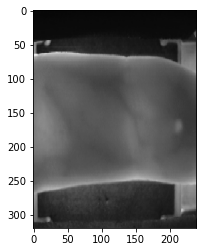

Predictions: 	 Filename:
003 		 003\middle_4.bmp


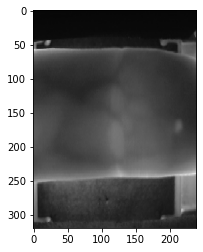

Predictions: 	 Filename:
003 		 003\middle_5.bmp


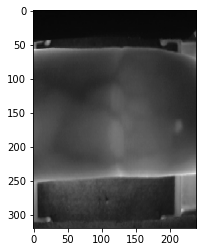

Predictions: 	 Filename:
004 		 003\ring_4.bmp


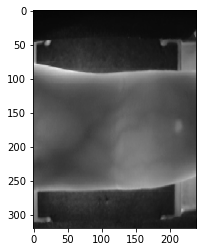

Predictions: 	 Filename:
001 		 003\ring_5.bmp


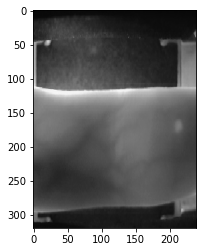

Predictions: 	 Filename:
001 		 003\ring_6.bmp


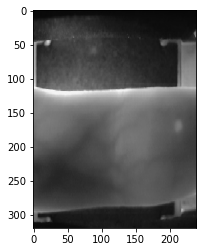

Predictions: 	 Filename:
004 		 004\index_4.bmp


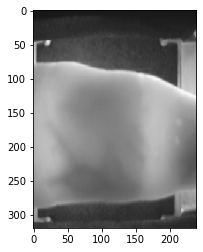

Predictions: 	 Filename:
004 		 004\index_5.bmp


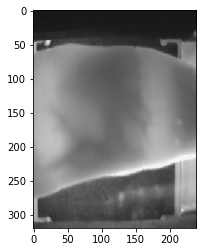

Predictions: 	 Filename:
004 		 004\middle_4.bmp


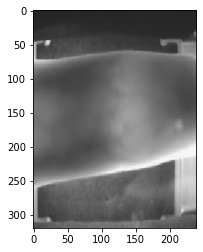

Predictions: 	 Filename:
004 		 004\middle_5.bmp


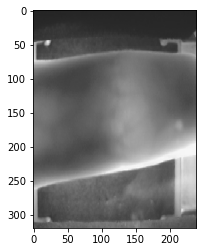

Predictions: 	 Filename:
004 		 004\ring_4.bmp


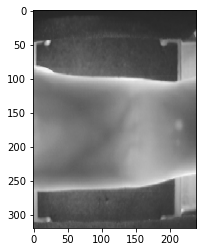

Predictions: 	 Filename:
004 		 004\ring_5.bmp


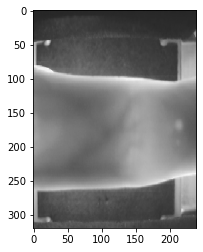

Predictions: 	 Filename:
004 		 004\ring_6.bmp


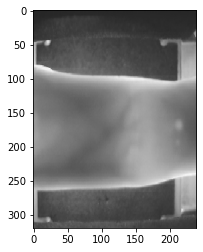

Predictions: 	 Filename:
005 		 005\index_4.bmp


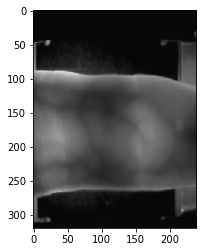

Predictions: 	 Filename:
005 		 005\index_5.bmp


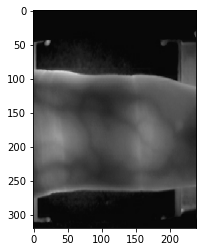

Predictions: 	 Filename:
005 		 005\middle_4.bmp


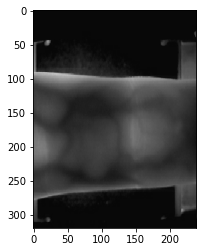

Predictions: 	 Filename:
005 		 005\middle_5.bmp


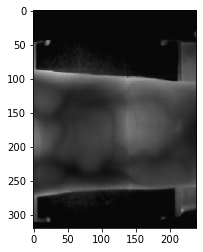

Predictions: 	 Filename:
001 		 005\ring_4.bmp
Predictions: 	 Filename:
001 		 005\ring_5.bmp
Predictions: 	 Filename:
001 		 005\ring_6.bmp
Predictions: 	 Filename:
001 		 006\index_1.bmp
Predictions: 	 Filename:
001 		 006\middle_1.bmp
Predictions: 	 Filename:
002 		 006\middle_3.bmp
Predictions: 	 Filename:
001 		 006\ring_2.bmp
Predictions: 	 Filename:
001 		 006\ring_3.bmp


In [124]:
#print("Evaluate on test data")
#results = model.evaluate(val_set)
#print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
#print("Generate predictions for 3 samples")
#predictions = model.predict(val_set)
#print(predictions.shape)

#y_prob = model.predict_generator(val_set,steps=len(val_set),verbose=1)
pred = model.predict_generator(val_set,verbose=1,steps=len(val_set))
predicted_class_indices=np.argmax(pred,axis=1)
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=val_set.filenames

results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
print(predicted_class_indices)
#print(labels)
#print(predictions)


#print(val_set)
#print(y_prob)
x,y = val_set.next()

#c1=np.round(y_prob)
#filenames=val_set.filenames
#results=pd.DataFrame({"file":filenames,"pr":y_prob[:,0],"class":c1[:,0]})
#display(results)

for i in range(len(results)):
    print("Predictions:","\t","Filename:")
    print(results['Predictions'][i],"\t\t",results['Filename'][i])
    if i<32:
        image = x[i]
    
        plt.imshow(image)
        plt.show()
    
#print(results)

#y_classes = y_prob.argmax(axis=1)
#print(y_classes)
#print("predictions shape:", predictions.shape)

Prediction List: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
True List: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
train Accuracy = 0.82


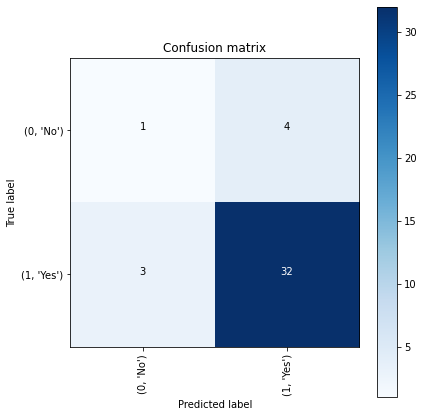

In [125]:
val_set.reset()
predictions = model.predict(val_set)
prediction_list = []
for i in predictions:
    prediction_list.append(1 if any(x>0.5 for x in i) else 0)
print("Prediction List:",prediction_list)
u_val=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0]
print("True List:",u_val)
accuracy = accuracy_score(u_val, prediction_list)
print('train Accuracy = %.2f' % accuracy)
label = dict()
label[0]="No"
label[1]="Yes"
confusion_mtx = confusion_matrix(u_val, prediction_list) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(label.items()), normalize=False)